(1) Go back to the COVID-19 dataset from https://github.com/nytimes/covid-19-data (tutorial 2, problem 5). Extract and plot the same data as before, but now using `pandas`.

Next, use `pandas` to create dataframes of the number of cases in all states on a certain day. Plot a horizontal bar grpah to show this. Pick another day and plot this data on top of the previous one to visualize the difference between these two days on the same figure.

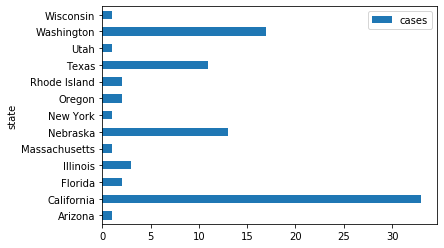

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# read file
mydata=pd.read_csv("us-states.csv")

# new dataframe with dates only
days=mydata['date']

# new dataframe for cases only when date is the one specified, notice double equal to for comparison
March01cases=mydata[days=='2020-03-01']

# barh as in tutorial, here we an pick which row of the data frame to the x and y axis
# try removing the y-axis to plot all information on that row in dataframe
March01cases.plot.barh(x='state',y='cases')

plt.show()

# to plot another data set, repeat with another date
# to plot together, create a dataframe with both sets and plot that

(2a,b,c) As described in the tutorial text, create packaged functions for Gauss elimination with and without pivoting, and the Gauss-Jordan elimination. These functions should take an $n \times n$ matrix and an $n \times 1$ column vector as input, and give the solution to the linear system as output.

Some linear systems have no solution or infinite solutions (recall Cramer's rule from linear algebra). How would you check for these cases and prevent a singular solution?

In [16]:
# Gauss without pivot

# create a function Gauss(A,b)
# input A: n x n matrix
# input b: n x 1 column vector
# return as output: n x 1 column vector solution of system Ax=b

import numpy as np
def Gauss(A,b):
    n=len(b)
    Aug=np.hstack((A,b))

    for i in range(n-1):
        for j in range(i+1,n):
            if Aug[j,i]!=0.:
                mult=-Aug[j,i]/Aug[i,i]
                Aug[j,:]+=mult*Aug[i,:]
    
    for i in range(n-1,-1,-1):
        for j in range(i+1,n):
            Aug[i,-1]-=Aug[i,j]*Aug[j,-1]
        Aug[i,-1]/=Aug[i,i]
    
    return np.reshape(Aug[:,-1],(n,1))


# to check for no or infinite solutions, calculate determinant as well (problem 5), and print an error message
# if determinant is zero

In [2]:
# Gauss with pivot

# create a function GaussPiv(A,b)
# input A: n x n matrix
# input b: n x 1 column vector
# return as output: n x 1 column vector solution of system Ax=b
# must use a pivot row swap if diagonal entry is 0


import numpy as np
def GaussPiv(A,b):
    n=len(b)
    Aug=np.hstack((A,b))

    for i in range(n-1):
        if Aug[i,i]==0:
            for j in range(i+1,n):
                if Aug[j,i]!=0:
                    Aug[[i,j]]=Aug[[j,i]]
                    break # emergency exit, so the swap only happens once
        
        for j in range(i+1,n):
            if Aug[j,i]!=0.:
                mult=-Aug[j,i]/Aug[i,i]
                Aug[j,:]+=mult*Aug[i,:]

    for i in range(n-1,-1,-1):
        for j in range(i+1,n):
            Aug[i,-1]-=Aug[i,j]*Aug[j,-1]
        Aug[i,-1]/=Aug[i,i]
    
    return np.reshape(Aug[:,-1],(n,1))

In [3]:
# Gauss-Jordan

# creates a function GaussJ(A,b) for Gauss-Jordan elimination
# input A: n x n matrix
# input b: n x 1 column vector
# return as output: n x 1 column vector solution of system Ax=b
# must use a pivot row swap if diagonal entry is 0

import numpy as np
def GaussJ(A,b):
    n=len(b)
    Aug=np.hstack((A,b))

    for i in range(n): # loop to n, so last row is also used as pivot
        if Aug[i,i]==0:
            for j in range(i+1,n):
                if Aug[j,i]!=0:
                    Aug[[i,j]]=Aug[[j,i]]
                    break
        
        for j in [m for m in range(n) if m!=i]: # short hand to skip over i
            if Aug[j,i]!=0.:
                mult=-Aug[j,i]/Aug[i,i]
                Aug[j,:]+=mult*Aug[i,:]
        
        Aug[i,:]/=Aug[i,i] # normalize (think why that's OK to do at end and not beginning)
    
    return np.reshape(Aug[:,-1],(n,1))

(3) A common matrix type that comes up in solving boundary-value problems (week 9/10) are banded systems. These matrices only have terms along specific diagonal 'bands'. The simplest is the [tridiagonal matrix](https://en.wikipedia.org/wiki/Tridiagonal_matrix), in which the only non-zero entries are along the main diagonal and the adjacent diagonal lines:
$$\begin{bmatrix} t_{00} & t_{01} &  &  & \\ t_{10}& t_{11} & t_{12} & &  \\ & t_{21} & \ddots &\ddots& \\& & \ddots & \ddots &t_{n-2,n-1} \\& &  & t_{n-1,n-2} &t_{n-1,n-1}\end{bmatrix} \begin{bmatrix} x_0 \\ x_1 \\ .\\.\\.\\ x_{n-1}  \end{bmatrix}= \begin{bmatrix} b_0 \\ b_1 \\ .\\.\\.\\ b_{n-1}  \end{bmatrix}$$

Running loops through row and columns filled mostly with zeros is inefficient, so adapt the Gauss-Jordan elimination to only have to loop through the three diagonal lines. 

_Non-coding assignment: Try to roughly estimate the computational cost of such a tridiagonal solver. How much faster would this code ideally be for a $100 \times 100$ tridiagonal matrix compared to standard Gauss-Jordan elimination_

In [18]:
# Tridiag solver, adapting Gauss-Jordan for neighboring element only

# see Kiusalaas textbook, page 60

(4) How would you evaluate the inverse of a $3\times 3$ matrix using three calls to the Gauss-Jordan function. Remember that naively calculating the determinant (which is required for the 'standard' method to find the inverse) is computationally expensive. Think about what the definition of the inverse of a matrix and how it relates to the identity matrix. Could you recast this definition as three different linear systems...?

In [20]:
A=np.array([[4,-2,1],[-2,4,-2],[1,-2,4]],dtype=float)
b=np.array([[1],[0],[0]])

a1=GaussJ(A,np.array([[1],[0],[0]]))
a2=GaussJ(A,np.array([[0],[1],[0]]))
a3=GaussJ(A,np.array([[0],[0],[1]]))
Ainv=np.hstack((a1,a2))
Ainv=np.hstack((Ainv,a3))
print(Ainv)

[[0.33333333 0.16666667 0.        ]
 [0.16666667 0.41666667 0.16666667]
 [0.         0.16666667 0.33333333]]


(5) Use a simple $3 \times 3$ matrix to perform every step of the Gauss-Jordan elimination manually, and keep track of how the determinant of the matrix changes with each step. Using this knowledge, how would you code a function that calculates the determinant as you go throught the elimination process?

How does row swapping (or pivoting) affect the determinant?

Solution: work through a small Gauss elimination and calculate determinant at each stage to see what changes. You will see that each row swap (if pivoted) multiplies the determinant by -1. Each multiplication of a row by a constant multiples the determinant by the same constant. And finally, once in diagonal form, the determinant of a matrix is simply the produc tof diagonal terms. Using this information, we can add the following lines to thje Gauss-Jordan routine from above to modify it into a determinant calculator

In [4]:
def my_deter(A):
    n=len(A)
    detsign=1 #initialize to +1
    det=1 #initialize to +1
    
    for i in range(n): # loop to n, so last row is also used as pivot
        if A[i,i]==0:
            for j in range(i+1,n):
                if A[j,i]!=0:
                    A[[i,j]]=A[[j,i]]
                    detsign=-1*detsign #change sign every time a row swap happens
                    break
        
        for j in [m for m in range(n) if m!=i]: # short hand to skip over i
            if A[j,i]!=0.:
                mult=-A[j,i]/A[i,i]
                A[j,:]+=mult*A[i,:]
        
        det*=A[i,i] # multiply diagonals
    
    return detsign*det

In [5]:
# test against linalg determinant calculator

import numpy as np
import numpy.linalg as la

# generate random matrix
A=np.random.uniform(10,5,(10,10))

print('linalg:', la.det(A))
print('homemade:', my_deter(A))

linalg: 263584.1945786081
homemade: 263584.1945786087
